In [4]:
import os 
os.chdir("../")

In [5]:
from sde.sde_class import sde_class
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
sde = sde_class(T=1, N=10000, M=1000)

In [4]:
def mu_fun(x):
    return 2 * x
def sigma_fun(x):
    return x

In [5]:
X_dict = {}
for R in [1,2,128,256]:
    X = sde.euler_maruyama(mu_fun=mu_fun,
                            sigma_fun=sigma_fun,
                            x0=1,
                            R=R)
    X_dict[R] = X

100%|██████████| 39/39 [00:00<00:00, 11956.57it/s]


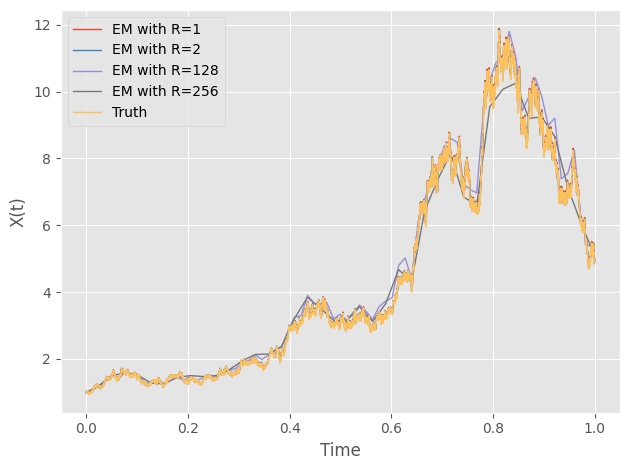

In [6]:
plt.style.use('ggplot')
for R in X_dict:
    plt.plot(sde.time[::R], X_dict[R][0,:], 
             label='EM with R='+str(R),
             linewidth=1)
plt.plot(sde.time, np.exp((2-0.5)*sde.time + sde.W[0,:]), 
        label="Truth",
        linewidth=1)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.tight_layout()

In [7]:
# Milstein 

In [8]:
def d_sigma_fun(x):
    return 1
m_X_dict = {}
for R in [1,2,128,256]:
    X = sde.milstein(mu_fun=mu_fun,
                    sigma_fun=sigma_fun,
                    d_sigma_fun=d_sigma_fun,
                    x0=1,
                    R=R)
    m_X_dict[R] = X

100%|██████████| 39/39 [00:00<00:00, 12420.49it/s]


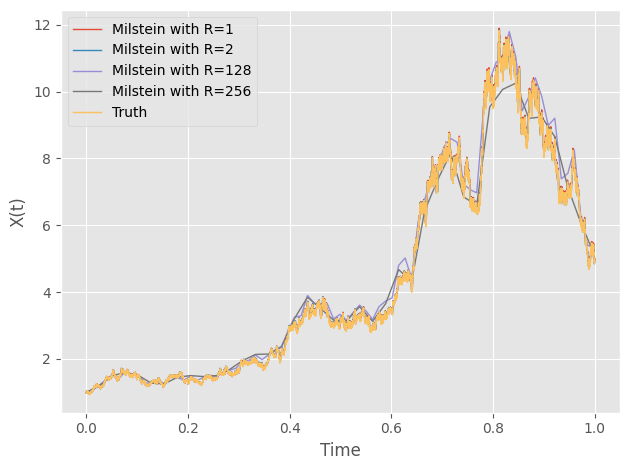

In [9]:
plt.style.use('ggplot')
for R in m_X_dict:
    plt.plot(sde.time[::R], X_dict[R][0,:], 
             label='Milstein with R='+str(R),
             linewidth=1)
plt.plot(sde.time, np.exp((2-0.5)*sde.time + sde.W[0,:]), 
        label="Truth",
        linewidth=1)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.tight_layout()

In [10]:
error_df = []
for R in X_dict:
    for path in range(1000):
        error_df.append(["EM", R, X_dict[R][path,-1] - np.exp((2-0.5)*1 + sde.W[path,-1])])

for R in m_X_dict:
    for path in range(1000):
        error_df.append(["Milstein", R, m_X_dict[R][path,-1] - np.exp((2-0.5)*1 + sde.W[path,-1])]) 
    
error_df = pd.DataFrame(error_df, columns=["Method", "R", "Error"])       

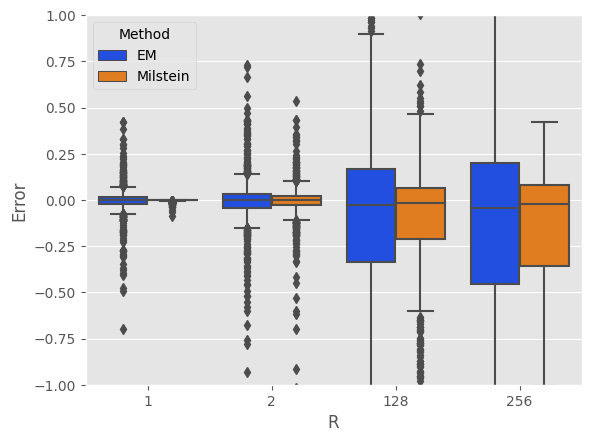

In [11]:
sns.boxplot(data=error_df,
            hue='Method',
            x="R",
            y="Error",
            palette="bright")
plt.ylim([-1,1])
plt.show()

In [ ]:
# Chain rule 

In [6]:
sde = sde_class(T=1, N=1000, M=1)

In [7]:
def x_mu_fun(x):
    return 2-x
def x_sigma_fun(x):
    return 1*np.sqrt(x)
def v_mu_fun(v):
    return (4*2 - 1)/(8*v) - 0.5 * v
def v_sigma_fun(v):
    return 0.5 * 1

In [8]:
X = sde.euler_maruyama(mu_fun=x_mu_fun,
                       sigma_fun=x_sigma_fun,
                       x0=1)
V = sde.euler_maruyama(mu_fun=v_mu_fun,
                       sigma_fun=v_sigma_fun,
                       x0=1)

100%|██████████| 999/999 [00:00<00:00, 42701.32it/s]


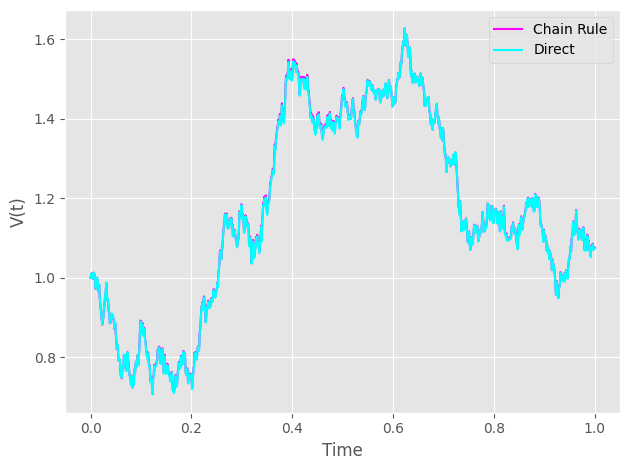

In [21]:
plt.style.use('ggplot')
plt.plot(sde.time, V[0,:], 
         label="Chain Rule", 
         c='magenta')
plt.plot(sde.time, np.sqrt(X[0,:]), 
         label="Direct", 
         c="cyan")
plt.xlabel("Time")
plt.ylabel("V(t)")
plt.legend()
plt.tight_layout()
plt.show()